# Tarefa 1: Aprendizado Não-Supervisionado

**Autor**: Matheus Jericó Palhares <br>
**LinkedIn**: https://linkedin.com/in/matheusjerico <br>
**Github**: https://github.com/matheusjerico

### 1) Implementar a função “fit_k_means(pontos, parada, max_iter)”, com K fixo e igual a 3. Retorne os centróides finais.

**Variáveis**:
- pontos: conjunto de pontos 2D (casos x mortes) que serão clusterizados
- parada: valor da variação dos clusters que indicará o fim do treinamento, i.e., se distancia(centroide_antigo, centroide_novo) < parada então termine o treinamento
- max_iter: quantidade máxima de vezes que o algoritmo deve ser repetido caso “parada” não seja alcançada


O relatório será o notebook exportado para um arquivo HTML e deve conter:
- Um scatter plot mostrando os centróides (com marcador x) e seus respectivos pontos (cada cluster deve estar em uma cor distinta)
- Para cada cluster, também devem ser exibidas as distâncias médias entre os pontos e seu respectivo centróide final
- Discorra sobre cada cluster: o que eles indicam?


#### 1. Bibliotecas

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from copy import deepcopy

#### 2. Carregando dados

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/matheusjerico/kmeans-scratch/master/Dataset/base-covid-19-us.csv")
dataset.head()

,county,cases,deaths
0,Abbeville,84,0
1,Acadia,741,21
2,Accomack,116,0
3,Ada,4264,41
4,Adair,325,8


In [3]:
dataset.shape

(1570, 3)

In [0]:
dataset.sort_values(by=['deaths'], inplace=True)

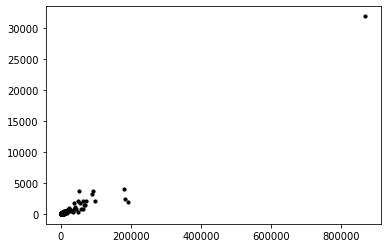

In [5]:
cases = dataset['cases'].values
deaths = dataset['deaths'].values
X = np.array(list(zip(cases, deaths)))
plt.scatter(cases, deaths, c='black', s=10)

#### 3. Criando classe do KMeans

In [0]:
class K_Means:
    def __init__(self, k, pontos, parada = 0.00000001, max_iter = 100):
        self.k = k
        self.parada = parada
        self.max_iter = max_iter
        self.data = pontos

    # Calculando distância euclidiana
    def dist(self, a, b, ax=1):
        return np.linalg.norm(a - b, axis=ax)

    def fit(self):
        # coordenada X centroide
        centroids_x = np.random.randint(0, np.median(self.data), size=self.k)
        # coordenada Y centroide
        centroids_y = np.random.randint(0, np.median(self.data), size=self.k)
        self.centroids = np.array(list(zip(centroids_x, centroids_y)), dtype=np.float32)
        
        # armazenando o valor dos centroides quando ele for atualizado
        self.centroids_old = np.zeros(self.centroids.shape)
        
        # label dos clusters 
        self.clusters = np.zeros(len(self.data))
        # distancia entre centroide novo e centroide antigo
        error = self.dist(self.centroids, self.centroids_old, None)
        # Loop de treinamento
        for i in range(self.max_iter):
            # atribuindo cada valor ao cluster mais próximo
            for i in range(len(self.data)):
                distances = self.dist(self.data[i], self.centroids)
                self.cluster = np.argmin(distances)
                self.clusters[i] = self.cluster
            # guardando valores do centroide antigo
            self.centroids_old = deepcopy(self.centroids)
            # encontrando novo centroide
            for i in range(self.k):
                self.points = [self.data[j] for j in range(len(self.data)) if self.clusters[j] == i]
                if len(self.points) > 0:
                  self.centroids[i] = np.mean(self.points, axis=0)
            error = self.dist(self.centroids, self.centroids_old, None)
            if error <= self.parada:
                break

#### 4. Inicializando a classe com os parametros desejados do exercício e realizando o treinamento

In [0]:
kmeans = K_Means(k = 3, pontos = X, parada = 0.0001, max_iter = 100)
kmeans.fit()

In [8]:
kmeans.centroids

array([[8.8945375e+04, 2.1148750e+03],
       [8.6882400e+05, 3.1887000e+04],
       [1.1869150e+03, 2.8396652e+01]], dtype=float32)

In [0]:
dataset['cluster'] = kmeans.clusters

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1570 entries, 0 to 995
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   county   1570 non-null   object 
 1   cases    1570 non-null   int64  
 2   deaths   1570 non-null   int64  
 3   cluster  1570 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 61.3+ KB


In [11]:
dataset.head()

,county,cases,deaths,cluster
0,Abbeville,84,0,2.0
865,Manitowoc,17,0,2.0
866,Marathon,108,0,2.0
869,Maries,20,0,2.0
871,Marinette,27,0,2.0


#### 5. Visualizando graficamente

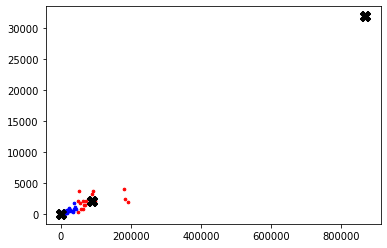

In [12]:
colors = int(kmeans.k/6 + 1)*['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(kmeans.k):
        points = np.array([X[j] for j in range(len(X)) if kmeans.clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        ax.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='X', s=100, c='black')

In [13]:
kmeans.centroids

array([[8.8945375e+04, 2.1148750e+03],
       [8.6882400e+05, 3.1887000e+04],
       [1.1869150e+03, 2.8396652e+01]], dtype=float32)

**Resposta**: <br>
Os clusters representam os estados com base na quantidade de casos e mortes do COVID-19.
- O primeiro cluster (verde), representa os estados que tiveram baixa quantidade de casos e mortes devido ao COVID-19
- O segundo cluster(azul), representa os estados que tiveram quantidade moderada/alta de casos e mortes devido ao COVID-19.
- O terceiro cluster (vermelho), representa o estado de New York (possuem uma quantidade muito elevada de casos de COVID-19


#### 6. Para cada cluster, também devem ser exibidas as distâncias médias entre os pontos e seu respectivo centróide final

In [0]:
dataset['centroide_x'] = np.nan
dataset['centroide_y'] = np.nan

In [0]:
for i in range(kmeans.k):
  dataset.loc[dataset['cluster'] == i, 'centroide_x'] = kmeans.centroids[i][0]
  dataset.loc[dataset['cluster'] == i, 'centroide_y'] = kmeans.centroids[i][1]

In [0]:
dataset['distancia_x'] = np.abs(dataset['cases'] - dataset['centroide_x'])
dataset['distancia_y'] = np.abs(dataset['deaths'] - dataset['centroide_y'])

In [17]:
for i in range(kmeans.k):
  print("Distância média (eixo X) entre os pontos do centroide {}: {}".format(i, np.mean(dataset[dataset['cluster']==i]['distancia_x'])))
  print("Distância média (eixo Y) entre os pontos do centroide {}: {}".format(i, np.mean(dataset[dataset['cluster']==i]['distancia_y'])))

Distância média (eixo X) entre os pontos do centroide 0: 37588.515625
Distância média (eixo Y) entre os pontos do centroide 0: 813.609375
Distância média (eixo X) entre os pontos do centroide 1: 0.0
Distância média (eixo Y) entre os pontos do centroide 1: 0.0
Distância média (eixo X) entre os pontos do centroide 2: 1638.429133506721
Distância média (eixo Y) entre os pontos do centroide 2: 40.70434138979055


### **Obs**: Retirando o estado de New York, a visualização do cluster fica muito melhor.

#### 7. Retirando o estado de New York
- Retirar o estado de New York, utilizar o algoritmo Kmeans e visualizar os cluster.

In [0]:
dataset=dataset.iloc[:-1,:]

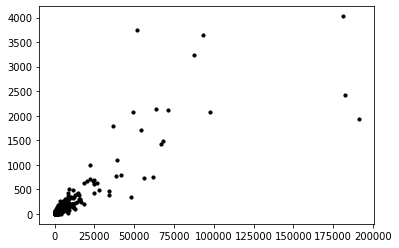

In [19]:
cases = dataset['cases'].values
deaths = dataset['deaths'].values
X = np.array(list(zip(cases, deaths)))
plt.scatter(cases, deaths, c='black', s=10)

In [0]:
kmeans = K_Means(k = 4, pontos = X, parada = 0.0001, max_iter = 100)
kmeans.fit()

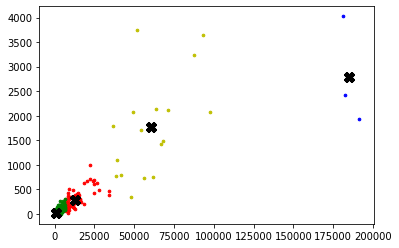

In [21]:
colors = int(kmeans.k/6 + 1)*['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(kmeans.k):
        points = np.array([X[j] for j in range(len(X)) if kmeans.clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        ax.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='X', s=100, c='black')

In [22]:
kmeans.centroids

array([[1.2876147e+04, 2.8992648e+02],
       [5.4778259e+02, 1.3448346e+01],
       [1.8495167e+05, 2.7943333e+03],
       [6.0276824e+04, 1.7601765e+03]], dtype=float32)

In [0]:
dataset['cluster'] = kmeans.clusters

In [0]:
dataset['centroide_x'] = np.nan
dataset['centroide_y'] = np.nan

In [0]:
for i in range(kmeans.k):
  dataset.loc[dataset['cluster'] == i, 'centroide_x'] = kmeans.centroids[i][0]
  dataset.loc[dataset['cluster'] == i, 'centroide_y'] = kmeans.centroids[i][1]

In [0]:
dataset['distancia_x'] = np.abs(dataset['cases'] - dataset['centroide_x'])
dataset['distancia_y'] = np.abs(dataset['deaths'] - dataset['centroide_y'])

In [27]:
for i in range(kmeans.k):
  print("Distância média (eixo X) entre os pontos do centroide {}: {}".format(i, np.mean(dataset[dataset['cluster']==i]['distancia_x'])))
  print("Distância média (eixo Y) entre os pontos do centroide {}: {}".format(i, np.mean(dataset[dataset['cluster']==i]['distancia_y'])))

Distância média (eixo X) entre os pontos do centroide 0: 5097.556382123162
Distância média (eixo Y) entre os pontos do centroide 0: 153.38408526252297
Distância média (eixo X) entre os pontos do centroide 1: 660.0884450929218
Distância média (eixo Y) entre os pontos do centroide 1: 18.168445818332465
Distância média (eixo X) entre os pontos do centroide 2: 4149.557291666667
Distância média (eixo Y) entre os pontos do centroide 2: 821.111083984375
Distância média (eixo X) entre os pontos do centroide 3: 14969.107306985294
Distância média (eixo Y) entre os pontos do centroide 3: 791.2456772748162


# Desafios

#### Método Elbow

In [0]:
def dist(a, b, ax=1):
  return np.linalg.norm(a - b, axis=ax)

def elbow_plot(data, k_max):
  dataset = data.copy()
  dists = []

  for i in range(k_max - 2):
    kmeans = K_Means(k = i+2, pontos = X, parada = 0.0001, max_iter = 10)
    kmeans.fit()

    dataset['cluster'] = kmeans.clusters
    dataset['centroide_x'] = np.nan
    dataset['centroide_y'] = np.nan

    for i in range(kmeans.k):
      dataset.loc[dataset['cluster'] == i, 'centroide_x'] = kmeans.centroids[i][0]
      dataset.loc[dataset['cluster'] == i, 'centroide_y'] = kmeans.centroids[i][1]

    dataset['distancia'] = dist(
        np.array(list(zip(dataset['cases'], dataset['deaths']))),
        np.array(list(zip(dataset['centroide_x'], dataset['centroide_y'])))
    )
    dists.append([i+2, dataset['distancia'].mean()])

  x = []
  y = []

  fig, ax = plt.subplots()
  for i in range(len(dists)):
    x.append(dists[i][0])
    y.append(dists[i][1])

  ax.plot(x, y, c='b', marker='x')

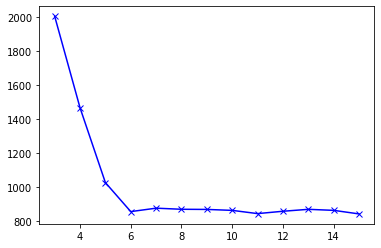

In [30]:
elbow_plot(dataset, 15)